In [6]:
#TY ETA 44 Hemant Joshi 
# Feature Vector by Using  Scale Invariant Feature Transform

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
img=cv2.imread('D:\TYETA\CV\s2.jpg',0)

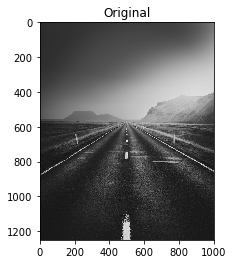

In [3]:
plt.imshow(img,cmap="gray")
plt.title('Original')
plt.show()

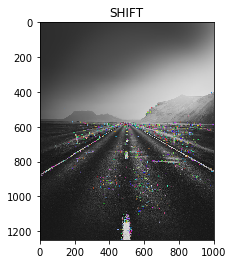

In [4]:
sift = cv2.SIFT_create()
kp = sift.detect(img,None)
img1=cv2.drawKeypoints(img,kp,img)
plt.imshow(img1,cmap="gray")
plt.title('SHIFT')
plt.show()

In [5]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans

main_folder=r"D:\TYETA\CV\Data_Set"

for folder in os.listdir(main_folder):
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()#initialise  detector
        keypoints, descriptors = sift.detectAndCompute(gray,None)
        out=pd.DataFrame(descriptors)
        csv_data=out.to_csv(str(folder)+'_sift.csv', mode='a', header=False)
    print('Extraction of ' + str(folder) +' images Done!')

Extraction of Cement Road images Done!
Extraction of Kaccha Road images Done!
Extraction of Paver Road images Done!
Extraction of Tarcoal Road images Done!


In [7]:
#KMeans Clustering

In [8]:
import pickle
main_folder=r"D:\TYETA\CV\Data_Set"

for folder in os.listdir(main_folder):
    road_df=pd.read_csv(str(folder)+'_sift.csv').iloc[:, 1:]
    kmeans = KMeans(n_clusters=5)
    model=kmeans.fit(road_df)
    pickle.dump(model, open(str(folder)+'_sift.pkl', 'wb')) 

In [9]:
for folder in os.listdir(main_folder):
    model = pickle.load(open(str(folder)+'_sift.pkl', "rb"))
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()#initialise  detector
        keypoints, descriptors = sift.detectAndCompute(gray,None)
        out=pd.DataFrame(descriptors)
        
        output=pd.DataFrame(model.predict(out))
        hist=np.histogram(output.values,bins=[0,1,2,3,4,5])
        histout=pd.DataFrame(hist[0])
        
        csv_data=histout.transpose().to_csv(str(folder)+'_exp13'+'.csv', mode='a', header=False)
        
    print('KMeans of ' + str(folder) +' images Done!')

KMeans of Cement Road images Done!
KMeans of Kaccha Road images Done!
KMeans of Paver Road images Done!
KMeans of Tarcoal Road images Done!


In [10]:
from csv import writer
from csv import reader

main_folder=r"D:\TYETA\CV\Data_Set"
i=0
for folder in os.listdir(main_folder):
    with open(str(folder)+'1'+'.csv', 'r') as read_obj, \
        open('FinalSIFT_exp13.csv', 'a+', newline='') as write_obj:
        csv_reader = reader(read_obj)     # Create a csv.reader object from the input file object
        csv_writer = writer(write_obj)    # Create a csv.writer object from the output file object
        # Read each row of the input csv file as list
        for row in csv_reader:
            row.append(i)            # Append the class in the row / list
            csv_writer.writerow(row)      # Add the updated row / list to the output file
    i+=1